In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from exploration_plots import plot_exploration
%matplotlib inline
# import seaborn as sns

In [4]:
df = pd.read_csv('../db/out/wta_mp.csv')

df.describe()

,match_id,y,rank_P1,rank_points_P1,elo_P1,glicko_P1,ht_P1,age_P1,games_played_P1,win_percentage_P1,...,completeness_P2,total_serve_points_P2,ace_probability_P2,win_percentage_diff_vs,bp_factor_diff_vs,first_won_serve_diff_vs,second_won_serve_diff_vs,ace_probability_diff_vs,double_fault_probability_diff_vs,aceDf_diff_vs
count,31712.000000,31712.000000,31712.000000,31712.000000,31712.000000,31712.000000,31712.000000,31712.000000,31712.000000,31712.000000,...,31157.000000,31157.000000,31157.000000,31712.000000,31712.000000,31712.000000,31712.000000,31712.000000,31712.000000,31712.000000
mean,42129.407921,0.505960,57.927252,1744.507158,1573.984864,1518.104901,173.948221,25.248420,175.032228,0.512232,...,0.496418,0.802799,0.037506,-0.008853,-0.000634,-0.002010,0.000030,0.000083,0.000172,0.002691
std,13359.639658,0.499972,87.224769,1636.176809,135.925133,37.790334,6.537301,4.014666,98.389487,0.124013,...,0.070723,0.071433,0.023795,0.755865,0.273996,0.136415,0.069219,0.046402,0.039798,1.778437
min,9141.000000,0.000000,1.000000,0.000000,1084.000000,809.454803,153.000000,15.100000,0.000000,0.000000,...,0.100000,0.200000,0.000000,-1.000000,-1.000000,-0.833333,-0.840659,-0.357143,-0.307692,-19.333333
25%,30974.750000,0.000000,19.000000,736.000000,1484.000000,1507.069171,170.000000,22.200000,95.000000,0.426471,...,0.452810,0.758253,0.020785,-1.000000,-0.166667,-0.085194,-0.042035,-0.023959,-0.023197,-0.595238
50%,42622.500000,1.000000,43.000000,1171.000000,1564.000000,1518.530365,174.000000,25.000000,164.000000,0.512346,...,0.494339,0.804702,0.033537,0.000000,0.000000,-0.001461,0.000256,0.000000,0.000000,0.000000
75%,53283.250000,1.000000,77.250000,2140.000000,1660.000000,1529.184204,179.000000,27.900000,246.000000,0.597765,...,0.535286,0.849164,0.049049,1.000000,0.162500,0.082209,0.042469,0.024474,0.023284,0.600000
max,65190.000000,1.000000,2500.000000,13615.000000,2124.000000,2166.042095,190.000000,47.600000,405.000000,1.000000,...,1.394962,1.169486,0.222222,1.000000,1.000000,0.900000,0.341892,0.333333,0.313557,39.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31712 entries, 0 to 31711
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   match_id                          31712 non-null  int64  
 1   date                              31712 non-null  object 
 2   y                                 31712 non-null  int64  
 3   name_P1                           31712 non-null  object 
 4   rank_P1                           31712 non-null  float64
 5   rank_points_P1                    31712 non-null  float64
 6   elo_P1                            31712 non-null  float64
 7   glicko_P1                         31712 non-null  float64
 8   ht_P1                             31712 non-null  float64
 9   age_P1                            31712 non-null  float64
 10  games_played_P1                   31712 non-null  int64  
 11  win_percentage_P1                 31712 non-null  float64
 12  surf

In [8]:
plot_exploration(df[df['name_P1'] == 'Iga Swiatek']['aceDf_P1'].values)

AttributeError: 'Series' object has no attribute 'columns'

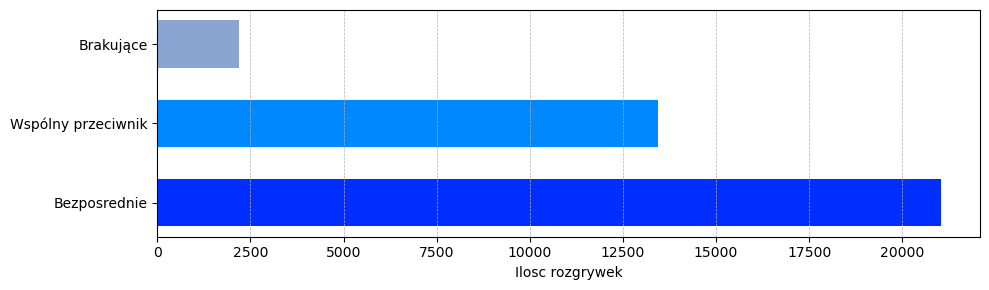

In [15]:
# Plotting the horizontal bar chart (rotated by 90 degrees)

pvp_stats = {'Bezposrednie': 21035,
             'Wspólny przeciwnik': 13431, 'Brakujące': 2187}

plt.style.use('default')
plt.figure(figsize=(10, 3))
plt.barh(list(pvp_stats.keys()), list(
    pvp_stats.values()), color=['#002eff', '#0088ff', '#8ba5d3'], height=0.6)
# plt.title('Ilość rozgrywek bezpośrednich i wspólnych przeciwników')
# plt.ylabel('Kategoria')
plt.xlabel('Ilosc rozgrywek')
plt.grid(axis='x', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [21]:
import json

# Load the content of the JSON file
with open('results.json', 'r') as file:
    data = json.load(file)

# Display the first few items to understand the structure
data_sample = data.keys()
print(data_sample)

dict_keys(['Regresja logistyczna', 'Las losowy', 'Drzewo decyzyjne', 'Wzmocnienie gradientowe', 'Sztuczna siec neuronowa'])


In [19]:
data.pop('ANN')

KeyError: 'ANN'

In [22]:
important = []

for key in data.keys():
    important.append(data[key]['selected_features'])

important

KeyError: 'selected_features'

In [28]:
precission = {}


for key in data.keys():
    precission[key] = data[key]['report_optimized']['weighted avg']['precision']

In [32]:
precission

{'GradientBoost': 0.679957265789003,
 'DecisionTree': 0.676764205899981,
 'RandomForest': 0.676066343407775,
 'LogisticRegression': 0.6816127651725135,
 'ANN': 0.6824391849386523}

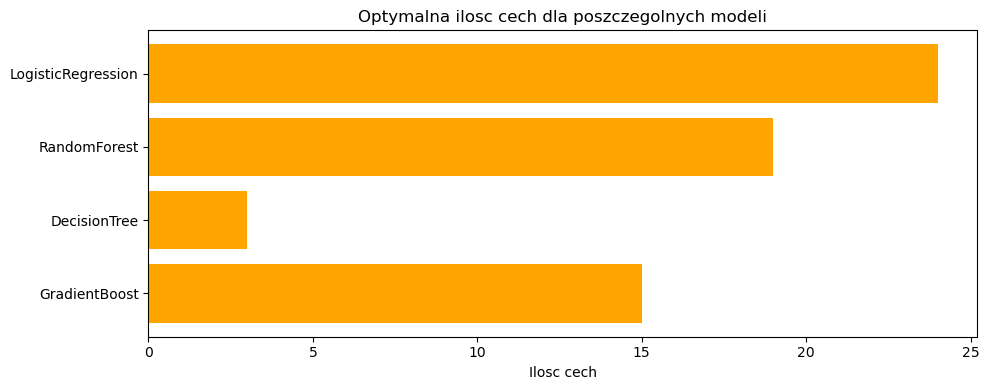

In [10]:
selected_f_sum = []

for key in data.keys():
    selected_f_sum.append(len(data[key]['selected_features']))


number_of_features = {}

for key in data.keys():
    number_of_features[key] = len(data[key]['selected_features'])

number_of_features


plt.figure(figsize=(10, 4))
bars = plt.barh(list(number_of_features.keys()),
                number_of_features.values(), color='orange')

plt.xlabel('Ilosc cech')
plt.title('Optymalna ilosc cech dla poszczegolnych modeli')
plt.tight_layout()
plt.show()

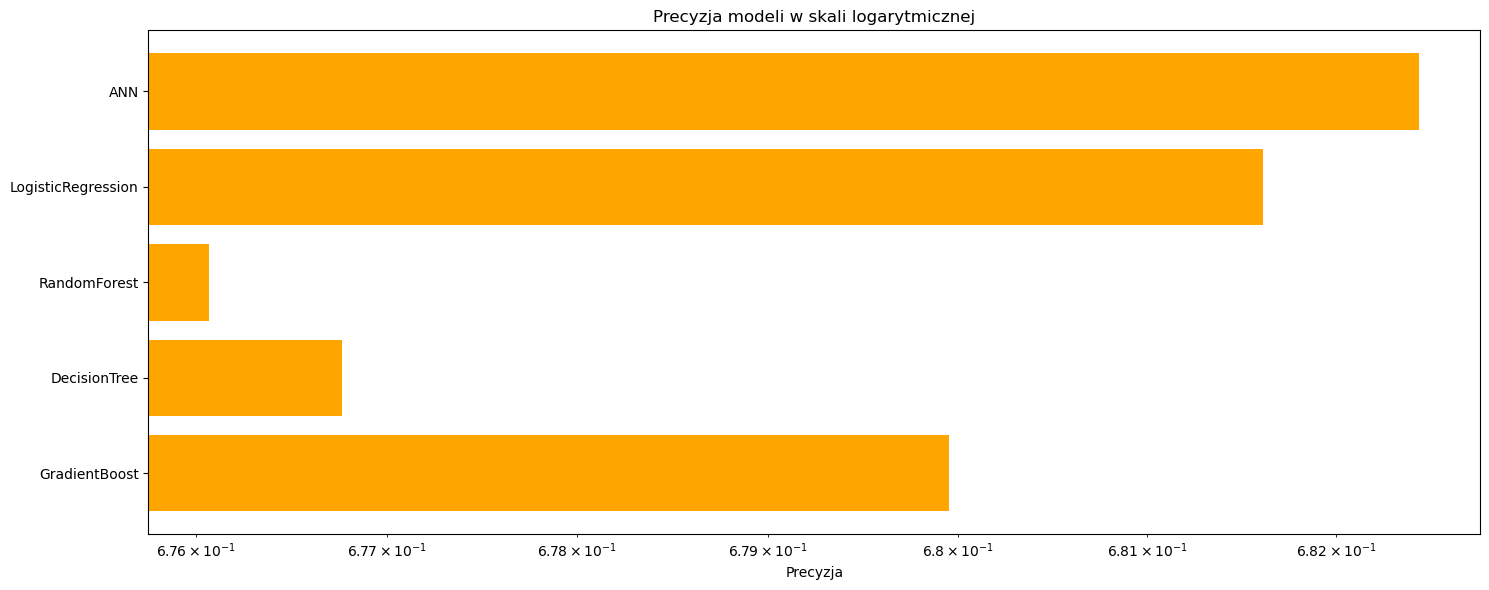

In [41]:
plt.figure(figsize=(15, 6))
bars = plt.barh(list(precission.keys()), precission.values(), color='orange')

plt.xlabel('Precyzja')
plt.xscale('log')
plt.title('Precyzja modeli w skali logarytmicznej')
plt.tight_layout()
plt.show()

In [11]:

feature_counts = {}
for feature_list in important:
    for feature in feature_list:
        feature_counts[feature] = feature_counts.get(feature, 0) + 1

# Plotting the counts in a bar chart
plt.figure(figsize=(15, 9))
plt.barh(list(feature_counts.keys()), feature_counts.values(), color='orange')
plt.xlabel('Suma istotnosci cech')
plt.title('Suma istotnosci cech w wybranych modelach')
plt.tight_layout()
plt.show()

NameError: name 'important' is not defined

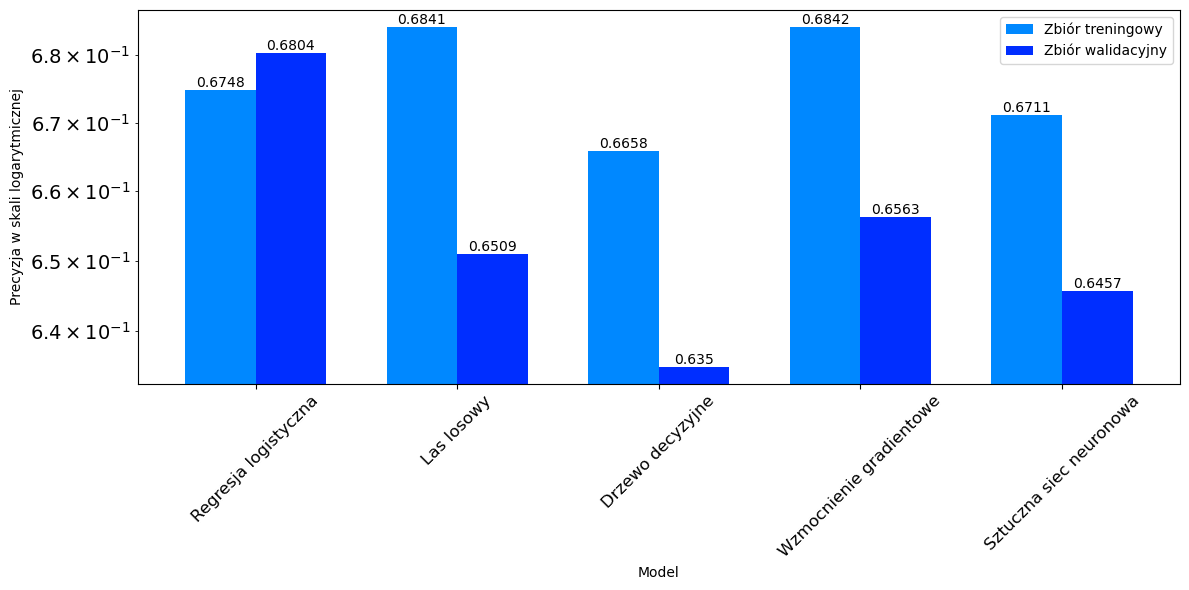

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import json


with open('results.json', 'r') as file:
    data = json.load(file)




# Extracting the required values for plotting
methods = list(data.keys())
prediction_optimized = [data[method]['prediction_optimized'] for method in methods]
v_prcision_optimized = [data[method]['v_prcision_optimized'] for method in methods]

# Creating a bar chart
plt.figure(figsize=(12, 6))

# Setting the positions and width for the bars
bar_width = 0.35
index = np.arange(len(methods))

# Plotting both prediction_optimized and v_prcision_optimized
bar1 = plt.bar(index, prediction_optimized, bar_width, label='Zbiór treningowy', color='#0088ff')
bar2 = plt.bar(index + bar_width, v_prcision_optimized, bar_width, label='Zbiór walidacyjny', color='#002eff')




for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center')

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center')



plt.xlabel('Model')
plt.ylabel('Precyzja w skali logarytmicznej')
plt.rc('xtick', labelsize=12)
plt.yscale('log')
plt.xticks(index + bar_width / 2, methods, rotation=45)
plt.legend()
plt.tight_layout()

# Display the bar chart
plt.show()

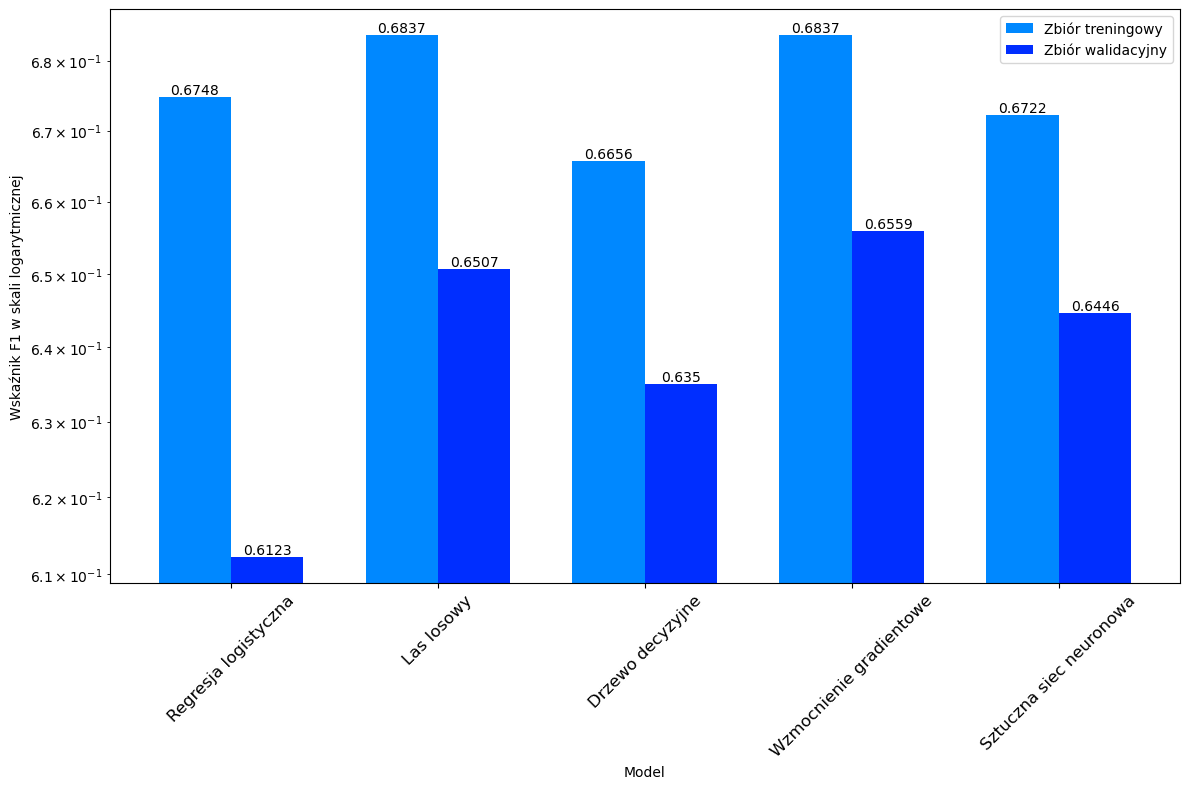

In [16]:
# Extracting the required values for plotting
methods = list(data.keys())
prediction_optimized = [data[method]['f1_score_opt'] for method in methods]
v_prcision_optimized = [data[method]['f1_score_opt_val'] for method in methods]

# Creating a bar chart
plt.figure(figsize=(12, 8))

# Setting the positions and width for the bars
bar_width = 0.35
index = np.arange(len(methods))

# Plotting both prediction_optimized and v_prcision_optimized
bar1 = plt.bar(index, prediction_optimized, bar_width, label='Zbiór treningowy', color='#0088ff')
bar2 = plt.bar(index + bar_width, v_prcision_optimized, bar_width, label='Zbiór walidacyjny', color='#002eff')




for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center')

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center')



plt.xlabel('Model')
plt.ylabel('Wskaźnik F1 w skali logarytmicznej')
plt.rc('xtick', labelsize=12)
plt.yscale('log')
plt.xticks(index + bar_width / 2, methods, rotation=45)
plt.legend()
plt.tight_layout()

# Display the bar chart
plt.show()

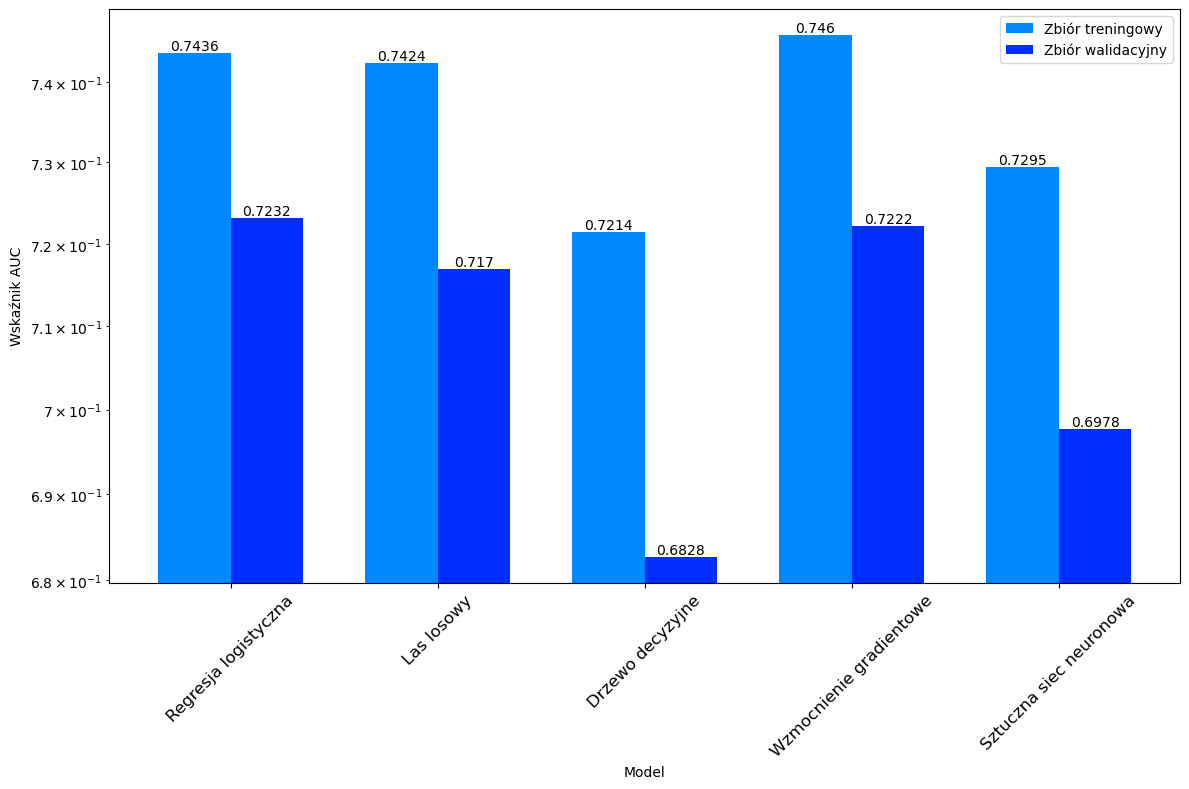

In [14]:
# Extracting the required values for plotting
methods = list(data.keys())
prediction_optimized = [data[method]['auc_opt'] for method in methods]
v_prcision_optimized = [data[method]['auc_opt_val'] for method in methods]

# Creating the plot
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(methods))

bar1 = plt.bar(index, prediction_optimized,bar_width, label='Zbiór treningowy', color='#0088ff')
bar2 = plt.bar(index + bar_width, v_prcision_optimized,bar_width, label='Zbiór walidacyjny', color='#002eff')

for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center')

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center')

plt.xlabel('Model')
plt.ylabel('Wskaźnik AUC')
plt.rc('xtick', labelsize=12)
plt.yscale('log')
plt.legend()
plt.xticks(index + bar_width / 2, methods, rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

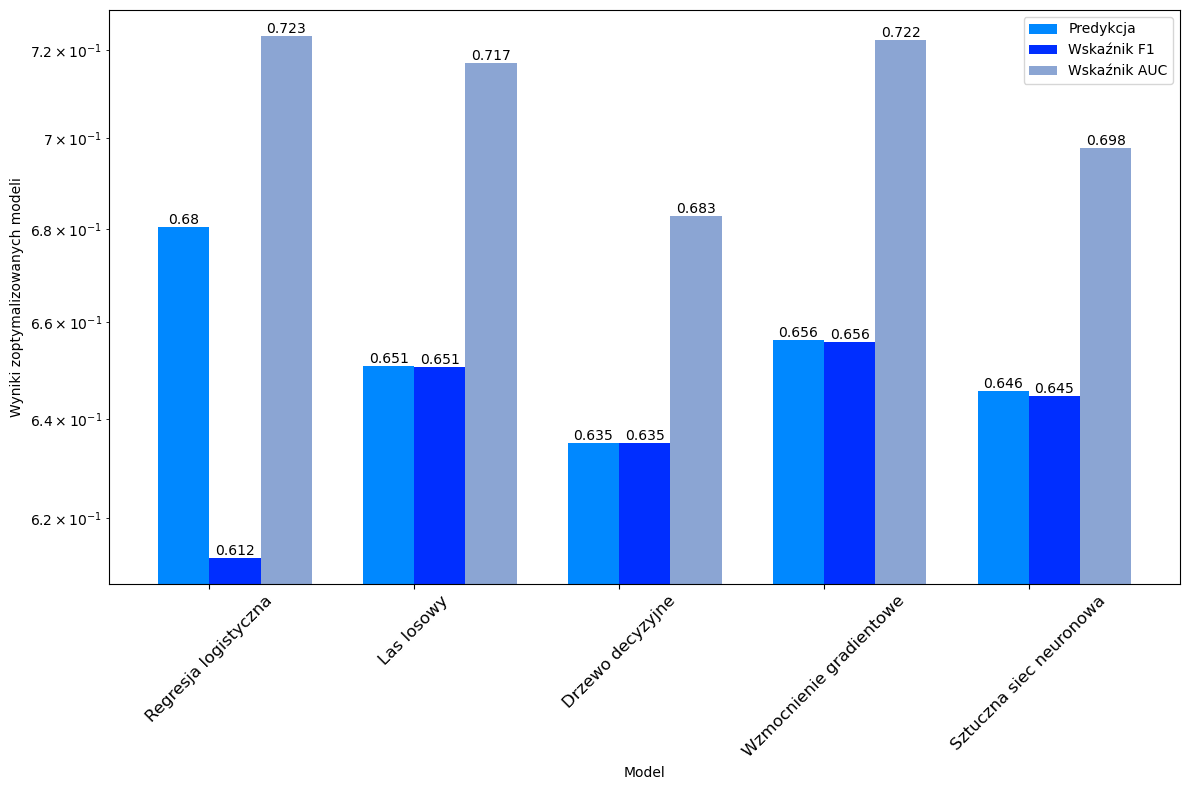

In [18]:
methods = list(data.keys())
prediction_optimized = [data[method]['v_prcision_optimized'] for method in methods]
v_prcision_optimized = [data[method]['f1_score_opt_val'] for method in methods]
auc = [data[method]['auc_opt_val'] for method in methods]

# Creating the plot
plt.figure(figsize=(12, 8))

bar_width = 0.25
index = np.arange(len(methods))

bar1 = plt.bar(index, prediction_optimized,bar_width, label='Predykcja', color='#0088ff')
bar2 = plt.bar(index + bar_width, v_prcision_optimized,bar_width, label='Wskaźnik F1', color='#002eff')
bar3 = plt.bar(index + bar_width*2, auc,bar_width, label='Wskaźnik AUC', color='#8ba5d3')

for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 3), va='bottom', ha='center')

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 3), va='bottom', ha='center')

for bar in bar3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 3), va='bottom', ha='center')

plt.xlabel('Model')
plt.ylabel('Wyniki zoptymalizowanych modeli')
plt.rc('xtick', labelsize=12)
plt.yscale('log')
plt.legend()
plt.xticks(index + bar_width / 2, methods, rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

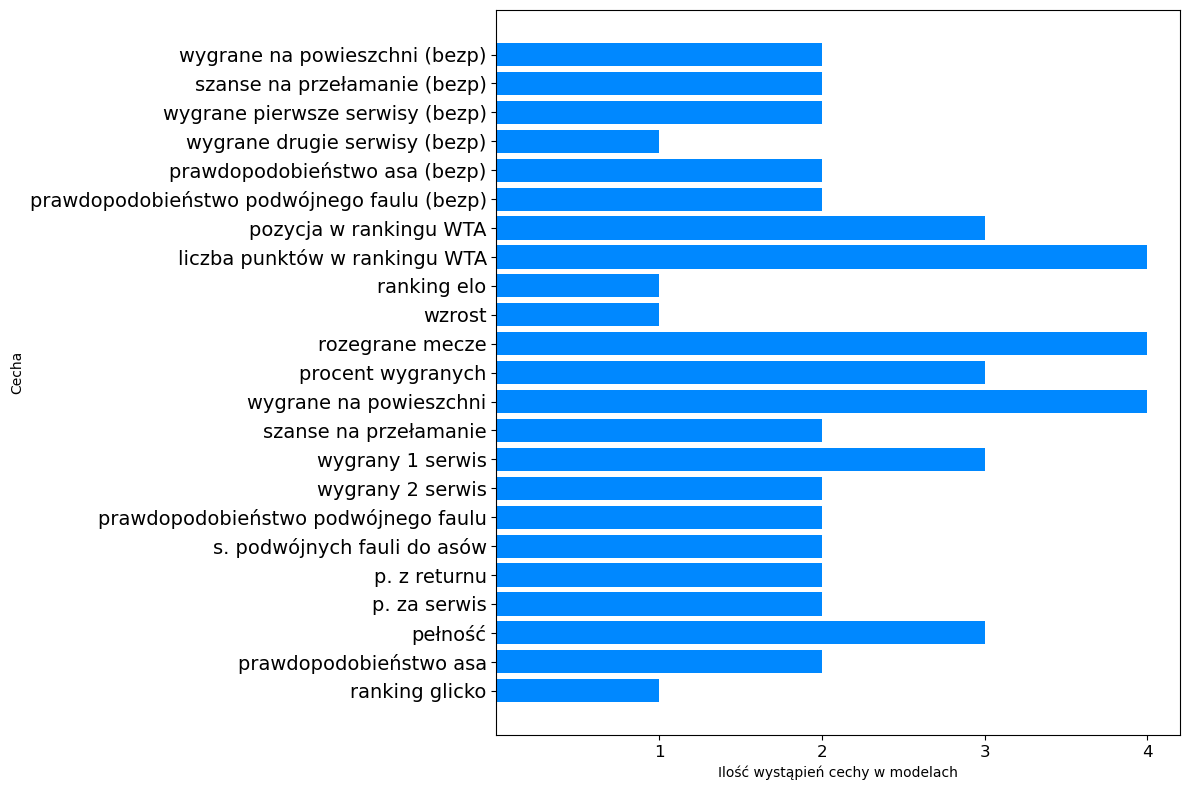

In [26]:
from collections import Counter
# Counting the frequency of each feature across all methods
# feature_counts = Counter()
# methods = list(data.keys())

# for method in methods:
#     if 'selected_features' in data[method]:
#         feature_counts.update(data[method]['selected_features'])

features_dict = {
    'ranking glicko' : 1,
    'prawdopodobieństwo asa' : 2,
    'pełność' : 3,
    'p. za serwis' : 2,
    'p. z returnu' : 2,
    's. podwójnych fauli do asów' : 2,
    'prawdopodobieństwo podwójnego faulu' : 2,
    'wygrany 2 serwis' : 2,
    'wygrany 1 serwis' : 3,
    'szanse na przełamanie' : 2,
    'wygrane na powieszchni' : 4,
    'procent wygranych':3,
    'rozegrane mecze':4,
    'wzrost':1,
    'ranking elo':1,
    'liczba punktów w rankingu WTA':4,
    'pozycja w rankingu WTA':3,
    'prawdopodobieństwo podwójnego faulu (bezp)' : 2,
    'prawdopodobieństwo asa (bezp)' : 2,
    'prawdopodobieństwo podwójnego faulu (bezp)' : 2,
    'wygrane drugie serwisy (bezp)' : 1,
    'wygrane pierwsze serwisy (bezp)' : 2,
    'szanse na przełamanie (bezp)' : 2,
    'wygrane na powieszchni (bezp)' : 2,
}


# Converting the counts to lists for plotting
features = list(features_dict.keys())
counts = list(features_dict.values())

# Creating a bar chart for the sum of each feature
plt.figure(figsize=(12,8))

plt.barh(features, counts, color='#0088ff')

plt.xlabel('Ilość wystąpień cechy w modelach')
plt.xticks([1,2,3,4])
plt.rc('ytick', labelsize=14)
plt.ylabel('Cecha')
plt.tight_layout()

# Display the bar chart
plt.show()

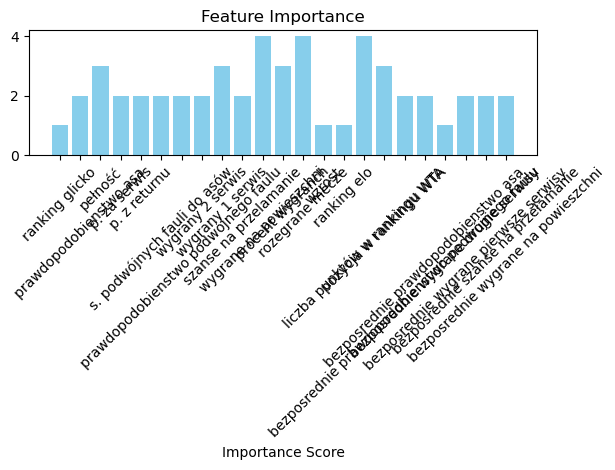

In [5]:
features_dict = {
    'ranking glicko' : 1,
    'prawdopodobienstwo asa' : 2,
    'pełność' : 3,
    'p. za serwis' : 2,
    'p. z returnu' : 2,
    's. podwójnych fauli do asów' : 2,
    'prawdopodobienstwo podwójnego faulu' : 2,
    'wygrany 2 serwis' : 2,
    'wygrany 1 serwis' : 3,
    'szanse na przelamanie' : 2,
    'wygrane na powieszchni' : 4,
    'procent wygranch':3,
    'rozegrane mecze':4,
    'wzrost':1,
    'ranking elo':1,
    'liczba punktów w rankingu WTA':4,
    'pozycja w rankingu WTA':3,
    'prawdopodobienstwo podwójnego faulu (bezp)' : 2,
    'prawdopodobienstwo asa (bezp)' : 2,
    'prawdopodobienstwo podwójnego faulu (bezp)' : 2,
    'wygrane drugie serwisy (bezp)' : 1,
    'wygrane pierwsze serwisy (bezp)' : 2,
    'szanse na przełamanie (bezp)' : 2,
    'wygrane na powieszchni (bezp)' : 2,
}


plt.bar(list(features_dict.keys()), list(features_dict.values()), color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()



# Showing the plot
plt.show()



# methods = list(data.keys())
# prediction_optimized = [data[method]['auc_opt'] for method in methods]
# v_prcision_optimized = [data[method]['auc_opt_val'] for method in methods]

# # Creating the plot
# plt.figure(figsize=(10, 6))


# index = np.arange(len(methods))

# bar1 = plt.bar(index, prediction_optimized,bar_width, label='AUC testowe', color='#0088ff')
# bar2 = plt.bar(index + bar_width, v_prcision_optimized,bar_width, label='AUC walidacyjne', color='#002eff')

# for bar in bar1:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center')

# for bar in bar2:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center')

# plt.xlabel('Model')
# plt.ylabel('Wskaźnik AUC')
# plt.yscale('log')
# plt.legend()
# plt.xticks(index + bar_width / 2, methods, rotation=45)
# plt.tight_layout()

# # Display the plot
# plt.show()